# Read the data
Usually, data from medical imaging is preserved in the DICOM format, and a specific step is required to view these images.

In [1]:
# Import Libraries
import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
import tarfile
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from collections import Counter


In [2]:
# path to images
data_dir = os.getcwd()
print(data_dir)
folder_name = "archive"
image_folders = os.path.join(data_dir, 'data', folder_name)
print(image_folders)


C:\Users\etson\PycharmProjects\pythonProject
C:\Users\etson\PycharmProjects\pythonProject\data\archive


In [3]:
# create a transformation pipeline for preprocessing images.
# any image passed through this pipeline will first be resized to a (50, 50) resolution and then converted into a PyTorch tensor.
transform = transforms.Compose([transforms.Resize((50, 50)), transforms.ToTensor()])

# os.listdir(image_folders) produces a list with all the folders in \data\archive path
# each folder is considered a small dataset where images are organized in folders by class/category
# images=[] is a list with class 'torchvision.datasets.folder.ImageFolder' objects 
images = []
for file in os.listdir(image_folders):
    images.append(ImageFolder(os.path.join(image_folders, file), transform=transform))

# concatenate the list of datasets
datasets = torch.utils.data.ConcatDataset(images)


In [4]:
print("images: ",type(images[0]))
# 'Number of datapoints: 549': This line tells us that there are a total of 549 images in the dataset '10253'.
print(images[0])


images:  <class 'torchvision.datasets.folder.ImageFolder'>
Dataset ImageFolder
    Number of datapoints: 549
    Root location: C:\Users\etson\PycharmProjects\pythonProject\data\archive\10253
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [5]:
print(type(datasets.datasets))
# for dataset in datasets.datasets:
#     print("Dataset:", type(dataset))
#     # for i in range(len(dataset)):
#     #     print("Element", i, ":", dataset[i])


<class 'list'>


In [6]:
# Determine the number of samples for each class
i=0
for dataset in datasets.datasets:
    if i==0:  # indicates that we are processing the first dataset in the loop.
        result = Counter(dataset.targets)  # result is a counter object Counter({0: int, 1: int})
        i += 1
    else:
        result += Counter(dataset.targets)

result = dict(result)
print("""Total Number of Images for each Class:
    Class 0 (No Breast Cancer): {}
    Class 1 (Breast Cancer present): {}""".format(result[0], result[1]))


Total Number of Images for each Class:
    Class 0 (No Breast Cancer): 198738
    Class 1 (Breast Cancer present): 78786


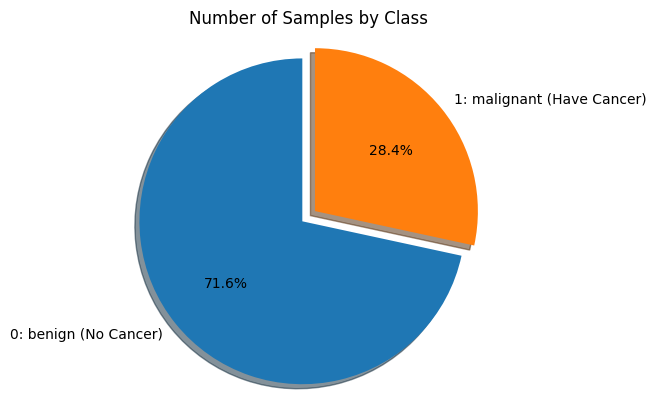

<Figure size 640x480 with 0 Axes>

In [7]:
# Pie chart (Number of Samples For Each Class)
labels = "0: benign (No Cancer)", "1: malignant (Have Cancer)"
total = result[0] + result[1]
sizes = [result[0]/total, result[1]/total]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Samples by Class")
plt.show()
plt.savefig("number_of_samples_breakdown")


# Split Data to Train, Validation and Test Set

In [8]:
#  Setting a seed ensures reproducibility, meaning that if you run the code multiple times with the same seed, you will get the same random results each time.
random_seed = 42
# sets the random seed for the PyTorch library. It ensures that any random operations performed by PyTorch will produce the same results each time the code is run, given the same seed.
torch.manual_seed(random_seed)

In [9]:
test_size = 38000
train_size = len(datasets) - test_size
print("train size: ", train_size)
train_ds, test_ds = random_split(datasets, [train_size, test_size])

train size:  239524


In [10]:
val_size = 38000
train_size = len(train_ds) - val_size
print("train size: ", train_size)
train_ds, val_ds = random_split(train_ds, [train_size, val_size])
print(len(train_ds), len(val_ds), len(test_ds))


train size:  201524
201524 38000 38000


In [11]:
# DataLoader: This is a class from the PyTorch library (torch.utils.data) used to load data in batches for training or evaluation. It helps in iterating over a dataset in batches, providing features such as shuffling, parallel data loading, and memory pinning.
train_data = DataLoader(train_ds, shuffle=True, num_workers=4, pin_memory=True)
val_data = DataLoader(val_ds, shuffle=True, num_workers=4, pin_memory=True)
test_data = DataLoader(test_ds, shuffle=True, num_workers=4, pin_memory=True)

In [12]:
# Save Train, Validation and Test Data
def save_data(data, mode="train"):
    i = 0
    for img, label in data:
        folder_path = os.path.join(os.path.join(os.getcwd(), mode), str(np.array(label)[0]))
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        i += 1
        image = transforms.ToPILImage()(img[0, :, :, :])
        image.save(os.path.join(folder_path, mode+"_"+str(i)+".jpg"), "JPEG")

In [13]:
# Save Train Data
save_data(train_data, mode="train")

# Save Validation Data
save_data(val_data, mode="validation")

# Save Test Data
save_data(test_data, mode="test")